In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin
from kdelearn.metrics import pi_kf

Weźmy 1000 elementów z rozkładu DWUWYMIAROWEGO N(0,1) i m elementów z rozkładu N(0,25) (25 to wariancja, odchylenie 5). Znajdźmy podział optymalny w sensie naszego wskaźnika dla m po kolei 0, 10, 20, 50, 100, 200, 500, 1000.

Siatka dla mnożników h: [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

Siatka dla r: (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

\newpage

m_noise=0
Wynik podstawowy przy r=0.05


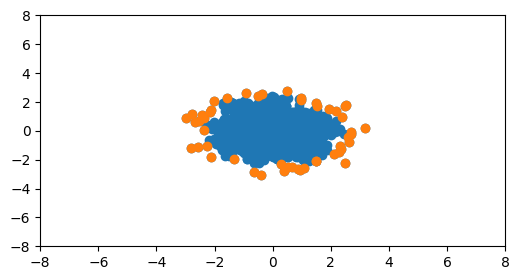

Wskaźnik jakości: 0.454332
Liczba nietypowych elementów: 50/1000 (5.000%)

Wynik po optymalizacji


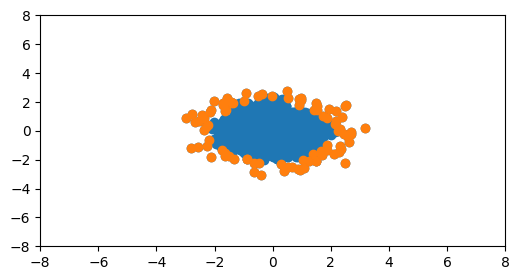

Najlepszy mnożnik h: 1.20 oraz r 0.09
Wskaźnik jakości: 0.377430
Liczba nietypowych elementów: 90/1000 (9.000%)

m_noise=10
Wynik podstawowy przy r=0.05


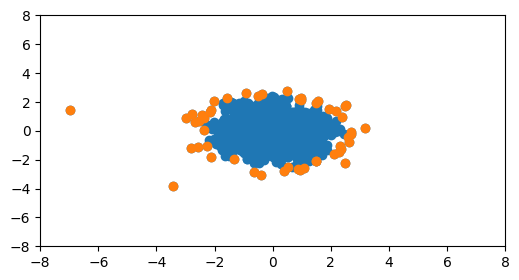

Wskaźnik jakości: 0.454117
Liczba nietypowych elementów: 51/1010 (5.050%)

Wynik po optymalizacji


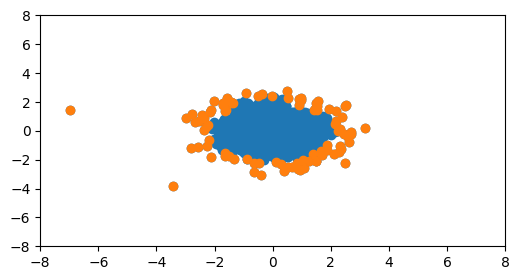

Najlepszy mnożnik h: 1.20 oraz r 0.09
Wskaźnik jakości: 0.373128
Liczba nietypowych elementów: 91/1010 (9.010%)

m_noise=20
Wynik podstawowy przy r=0.05


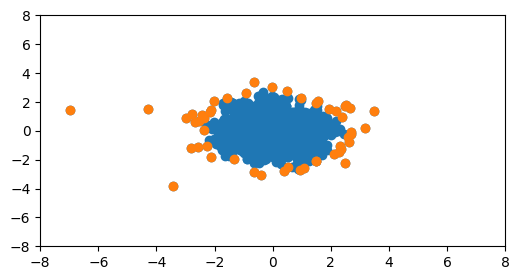

Wskaźnik jakości: 0.449154
Liczba nietypowych elementów: 51/1020 (5.000%)

Wynik po optymalizacji


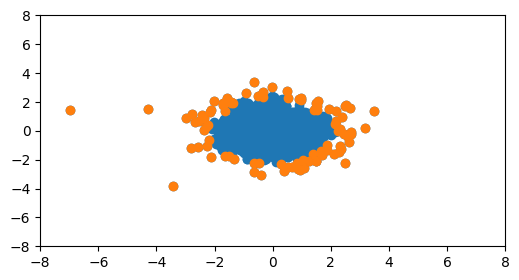

Najlepszy mnożnik h: 1.20 oraz r 0.09
Wskaźnik jakości: 0.358232
Liczba nietypowych elementów: 92/1020 (9.020%)

m_noise=50
Wynik podstawowy przy r=0.05


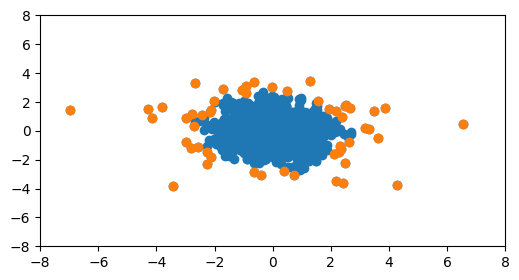

Wskaźnik jakości: 0.409653
Liczba nietypowych elementów: 53/1050 (5.048%)

Wynik po optymalizacji


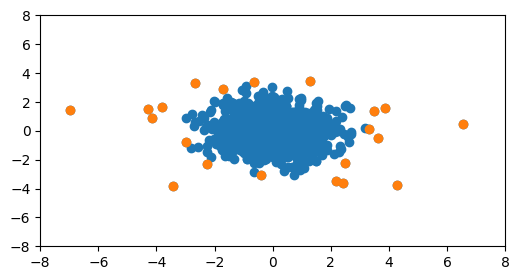

Najlepszy mnożnik h: 2.00 oraz r 0.02
Wskaźnik jakości: 0.294633
Liczba nietypowych elementów: 21/1050 (2.000%)

m_noise=100
Wynik podstawowy przy r=0.05


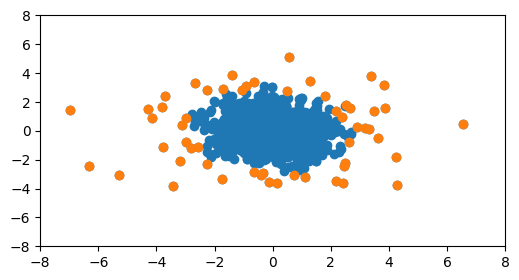

Wskaźnik jakości: 0.388027
Liczba nietypowych elementów: 55/1100 (5.000%)

Wynik po optymalizacji


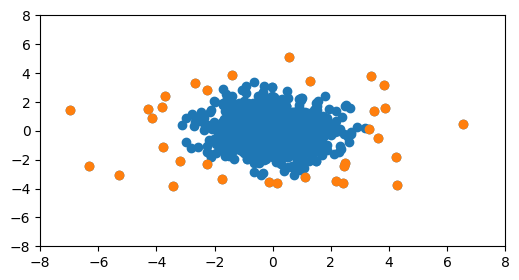

Najlepszy mnożnik h: 2.00 oraz r 0.03
Wskaźnik jakości: 0.235656
Liczba nietypowych elementów: 33/1100 (3.000%)

m_noise=200
Wynik podstawowy przy r=0.05


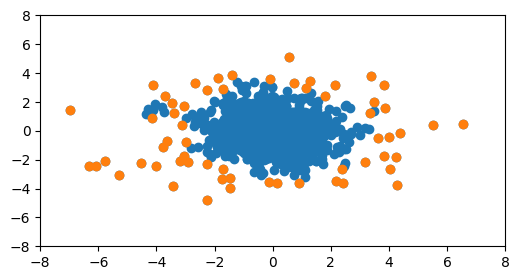

Wskaźnik jakości: 0.420596
Liczba nietypowych elementów: 60/1200 (5.000%)

Wynik po optymalizacji


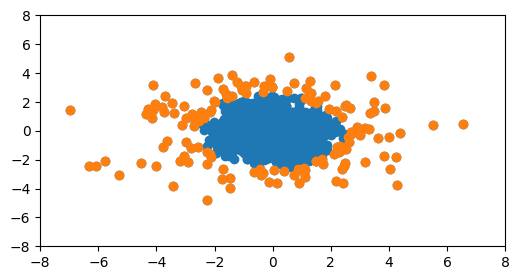

Najlepszy mnożnik h: 1.80 oraz r 0.12
Wskaźnik jakości: 0.235032
Liczba nietypowych elementów: 144/1200 (12.000%)

m_noise=500
Wynik podstawowy przy r=0.05


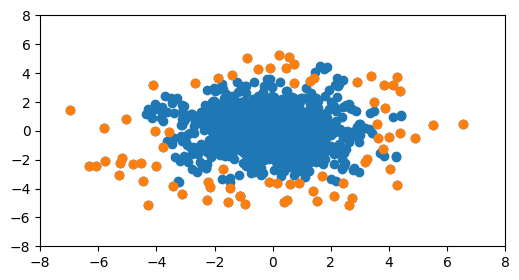

Wskaźnik jakości: 0.488223
Liczba nietypowych elementów: 75/1500 (5.000%)

Wynik po optymalizacji


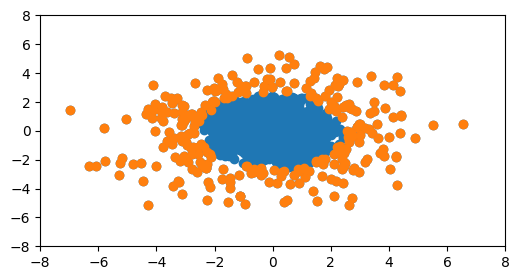

Najlepszy mnożnik h: 1.80 oraz r 0.19
Wskaźnik jakości: 0.229450
Liczba nietypowych elementów: 285/1500 (19.000%)

m_noise=1000
Wynik podstawowy przy r=0.05


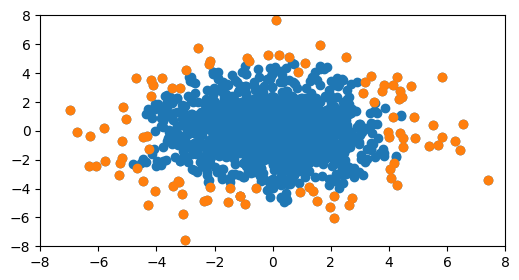

Wskaźnik jakości: 0.427645
Liczba nietypowych elementów: 100/2000 (5.000%)

Wynik po optymalizacji


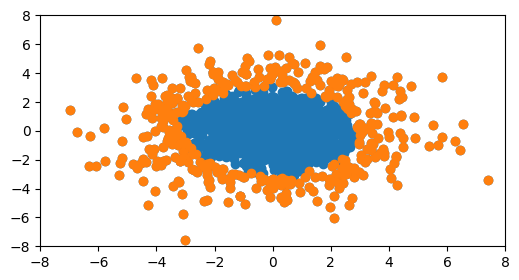

Najlepszy mnożnik h: 2.00 oraz r 0.20
Wskaźnik jakości: 0.257623
Liczba nietypowych elementów: 400/2000 (20.000%)



In [2]:
# n = 2
m_train1 = 1000
    
h_mul_grid = (1.0, 0.9, 1.2, 0.8, 1.4, 0.7, 1.6, 0.6, 1.8, 0.5, 2.0)
r_grid = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
          0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

for m_noise in [0, 10, 20, 50, 100, 200, 500, 1000]:
    np.random.seed(0)
    print(f"{m_noise=:}")
    print("Wynik podstawowy przy r=0.05")

    # Data
    x_train1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=(m_train1,))
    x_train2 = np.random.multivariate_normal([0, 0], [[5, 0], [0, 5]], size=(m_noise,))
    x_train = np.concatenate((x_train1, x_train2))

    bandwidth = direct_plugin(x_train)

    # Outliers detection
    outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.05)
    labels_pred = outliers_detector.predict(x_train)
    metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 1])
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1])
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.show()
    
    print(f"Wskaźnik jakości: {metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    # Dopasowanie parametrów na siatce
    print("Wynik po optymalizacji")
    
    best_metric = np.inf
    for h_mul in h_mul_grid:
        for r in r_grid:
            kde_outlier_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth * h_mul, r=r)
            labels_pred = kde_outlier_detector.predict(x_train)
            metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth * h_mul)
            if metric < best_metric:
                best_h_mul = h_mul
                best_r = r
                best_metric = metric

    # Outliers detection
    outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth * best_h_mul, r=best_r)
    labels_pred = outliers_detector.predict(x_train)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 1])
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1])
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.show()

    print(f"Najlepszy mnożnik h: {best_h_mul:.2f} oraz r {best_r:.2f}")
    print(f"Wskaźnik jakości: {best_metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
#     print("-" * 30)